# kNN분류 알고리즘

In [1]:
import kNN_py2 as kNN

In [2]:
dataSet, labels = kNN.createDataSet()

In [3]:
print(dataSet)

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]


In [4]:
print(labels)

['A', 'A', 'B', 'B']


In [5]:
type(dataSet)

numpy.ndarray

In [6]:
type(labels)

list

In [7]:
dataSet.shape

(4L, 2L)

In [8]:
dataSetSize = dataSet.shape[0]; dataSetSize

4L

In [9]:
inX = [0, 0.5]

### ※ 참고_1. numpy.tile - for Python2

In [10]:
import numpy as np
a = np.array([0, 1, 2]);a

array([0, 1, 2])

In [11]:
np.tile(a, 2) # 1차원 배열

array([0, 1, 2, 0, 1, 2])

In [12]:
np.tile(a, (1, 2)) # 2차원 배열

array([[0, 1, 2, 0, 1, 2]])

In [13]:
np.tile(a, (2, 1)) # 2차원 배열

array([[0, 1, 2],
       [0, 1, 2]])

In [14]:
np.tile(a, (2, 1, 2)) # 3차원 배열

array([[[0, 1, 2, 0, 1, 2]],

       [[0, 1, 2, 0, 1, 2]]])

In [15]:
np.tile(a, (2, 4, 2)) # 3차원 배열

array([[[0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2]],

       [[0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2]]])

In [16]:
b = np.array([[0, 1], [2, 3]]); b

array([[0, 1],
       [2, 3]])

In [17]:
np.tile(b, 2)

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

In [18]:
np.tile(b, (1, 2))

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

In [19]:
np.tile(b, (2, 1))

array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

In [20]:
np.tile(b, (3, 2, 1))

array([[[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]]])

In [21]:
print(dataSetSize)
np.tile([0, 0], (dataSetSize, 1))

4


array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

----

In [22]:
np.tile(inX, (dataSetSize,1))

array([[ 0. ,  0.5],
       [ 0. ,  0.5],
       [ 0. ,  0.5],
       [ 0. ,  0.5]])

In [23]:
diffMat = np.tile(inX, (dataSetSize,1))- dataSet; diffMat

array([[-1. , -0.6],
       [-1. , -0.5],
       [ 0. ,  0.5],
       [ 0. ,  0.4]])

### ※ 참고_2. 두 점 간 거리 구하기
* 피타고라스의 정리: https://ko.wikipedia.org/wiki/피타고라스의_정리 
* 두 점 사이의 거리(선분의 길이): https://www.youtube.com/watch?v=iSInGiiUOhI
* 두 점을 지나는 직선의 기울기: https://www.youtube.com/watch?v=2hKtZXyV-9o

---

In [24]:
sqDiffMat = diffMat ** 2; sqDiffMat

array([[ 1.  ,  0.36],
       [ 1.  ,  0.25],
       [ 0.  ,  0.25],
       [ 0.  ,  0.16]])

In [25]:
sqDiffMat[:, 0]  + sqDiffMat[:, 1]

array([ 1.36,  1.25,  0.25,  0.16])

In [26]:
sqDistances = sqDiffMat.sum(axis=1); sqDistances

array([ 1.36,  1.25,  0.25,  0.16])

In [27]:
distances = sqDistances ** 0.5; distances

array([ 1.16619038,  1.11803399,  0.5       ,  0.4       ])

In [28]:
sortedDistIndices =  distances.argsort(); sortedDistIndices

array([3, 2, 1, 0], dtype=int64)

### 참고_3. numpy.argsort
+ 반환값: 배열이 정렬되었을 때의 인덱스 배열(ndarray, int)
+ 마지막 축을 기준으로 정렬(기본값) https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html

In [29]:
# 1차원 배열
x = np.array([3, 1, 2]); print(x)
print(np.argsort(x))
print(x[np.argsort(x)])

[3 1 2]
[1 2 0]
[1 2 3]


In [30]:
# 2차원 배열
x = np.array([[0, 3], [2, 2]]); print(x)

[[0 3]
 [2 2]]


In [31]:
print(np.argsort(x, axis=0))
print(np.argsort(x, axis=1))
print(np.argsort(x, axis=-1))   # 마지막 축을 기준으로 정렬

[[0 1]
 [1 0]]
[[0 1]
 [0 1]]
[[0 1]
 [0 1]]


In [32]:
print(x[np.argsort(x, axis=0)])

[[[0 3]
  [2 2]]

 [[2 2]
  [0 3]]]


In [33]:
print(x[np.argsort(x, axis=1)])

[[[0 3]
  [2 2]]

 [[0 3]
  [2 2]]]


In [34]:
print(x[np.argsort(x, axis=-1)])   # 마지막 축을 기준으로 정렬

[[[0 3]
  [2 2]]

 [[0 3]
  [2 2]]]


In [35]:
# 3차원 배열
x = np.array([[[8, 1, 4], [1, 2, 5]], [[4, 2, 7], [6, 5, 4]]]); print(x)
print(np.argsort(x, axis=2))
print(np.argsort(x))
print(np.argsort(x, axis=0))

[[[8 1 4]
  [1 2 5]]

 [[4 2 7]
  [6 5 4]]]
[[[1 2 0]
  [0 1 2]]

 [[1 0 2]
  [2 1 0]]]
[[[1 2 0]
  [0 1 2]]

 [[1 0 2]
  [2 1 0]]]
[[[1 0 0]
  [0 0 1]]

 [[0 1 1]
  [1 1 0]]]


----

In [87]:
classCount = {}

In [88]:
k = 3

In [99]:
i = 2

In [100]:
labels[1]

'A'

In [101]:
voteIlabel = labels[sortedDistIndices[i]]; voteIlabel

'A'

### 참고_4. classCount함수 설명

In [41]:
d = {1: 'a', 3: 'b'}; d

{1: 'a', 3: 'b'}

In [42]:
d[1] # dictionary에서 1에 대응되는 value값을 반환

'a'

In [43]:
d[2] # dictionary에서 2에 대응되는 값이 없어 에러 발생

KeyError: 2

In [44]:
d.get(1)

'a'

In [45]:
d.get(2) # get 메소드를 사용할 경우  없는 값에 대해 None을 반환

In [46]:
d.get(2,'Not exist') # 추가 옶션설정을 통해 없는 값에 대한 반환 값을 결정할 수 있음

'Not exist'

In [47]:
d.get(3)

'b'

---

In [102]:
classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1;classCount

{'A': 1, 'B': 2}

In [103]:
list(classCount.iteritems())

[('A', 1), ('B', 2)]

In [50]:
import operator

In [51]:
operator.itemgetter(1)

In [52]:
sortedClasscount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
sortedClasscount
# value값을 기준은로 큰 값 순으로 정렬

[('A', 1)]

In [53]:
sortedClasscount[0]

('A', 1)

In [54]:
sortedClasscount[0][0]

'A'

In [55]:
reload(kNN)

<module 'kNN_py2' from 'kNN_py2.pyc'>

In [56]:
kNN.classify0([0, 0.5], dataSet, labels, 3)

'B'

In [57]:
kNN.classify0([0.8, 0.8], dataSet, labels, 3)

'A'

### Example: improving matches from a dating site with kNN

#### Example: using kNN on results from a dating site
1. Collect: 텍스트 파일 제공됨
2. Prepare: 파이썬에서 텍스트 파일 파싱
3. Analyze: Matplotlib을 사용하여 데이터의 2차원 플롯 생성
4. Train: kNN 알고리즘에는 훈련이 필요없음
5. Test: 헬렌이 준 데이터 중 일부를 테스트 데이터로 사용하는 함수 작성.
 - 테스트 데이터는 비테스트 데이터와 구별
 - 예측된 클래스가 실제 클래스와 일치하지 않으면 오류
6. Use: 헬렌이 입력한 몇몇 값을 바탕으로 헬렌이 좋아하는 상대인지 예측하는 간단한 명령행 프로그램 작성

#### 2.2.1 Prepare: parsing data from a text file
+ datingTestSet2.txt
    + 1,000 entries
    + features
        + Number of frequent flyer miles earned per year
        + Percentage of time spent playing video games
        + Liters of ice cream consumed per week

#### file2matrix 함수
+ 텍스트 파일의 데이터를 분류기가 사용할 수 있는 형태로 변환
+ 입력: 파일 이름
+ 출력: 훈련 데이터(행렬), 클래스 레이블(벡터)

In [104]:
filename = 'datingTestSet2.txt'

In [105]:
fr = open(filename)

In [106]:
numberOfLines = len(fr.readlines()); numberOfLines

1000

In [109]:
returnMat = np.zeros((numberOfLines, 3)); returnMat

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [130]:
classLabelVector = []

In [131]:
fr = open(filename)
index = 0

In [132]:
lines = fr.readlines()

In [145]:
line = lines[3]; line

'75136\t13.147394\t0.428964\t1\n'

In [146]:
line = line.strip(); line

'75136\t13.147394\t0.428964\t1'

In [147]:
listFromLine = line.split('\t'); listFromLine

['75136', '13.147394', '0.428964', '1']

In [148]:
returnMat[index, :] =listFromLine[:3]; returnMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  7.51360000e+04,   1.31473940e+01,   4.28964000e-01],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [149]:
classLabelVector.append(listFromLine[-1]); classLabelVector

['3', '2', '1']

In [150]:
index += 1

In [126]:
reload(kNN)

<module 'kNN_py2' from 'kNN_py2.py'>

In [127]:
datingDataMat, datingLabels = kNN.file2matrix(filename)

In [128]:
print datingDataMat

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]


In [129]:
print datingLabels

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 

In [151]:
mapping = {1: 'didnt like', 2: 'small doses', 3: 'large doses'}; mapping

{1: 'didnt like', 2: 'small doses', 3: 'large doses'}

In [156]:
mapping[datingLabels[0]]

'large doses'

In [153]:
mapping[int(classLabelVector[0])]

'large doses'

In [157]:
[mapping[label] for label in datingLabels]

['large doses',
 'small doses',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'large doses',
 'large doses',
 'didnt like',
 'large doses',
 'didnt like',
 'didnt like',
 'small doses',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'small doses',
 'large doses',
 'small doses',
 'didnt like',
 'small doses',
 'large doses',
 'small doses',
 'large doses',
 'small doses',
 'large doses',
 'small doses',
 'didnt like',
 'large doses',
 'didnt like',
 'large doses',
 'didnt like',
 'small doses',
 'didnt like',
 'didnt like',
 'small doses',
 'large doses',
 'large doses',
 'didnt like',
 'small doses',
 'large doses',
 'large doses',
 'large doses',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'small doses',
 'small doses',
 'didnt like',
 'large doses',
 'small doses',
 'small doses',
 'small doses',
 'small doses',
 'large doses',
 'didnt like',
 'small doses',
 'didnt like',
 'small doses',
 'small doses',
 'small doses',
 '

###  분석

In [158]:
import matplotlib
import matplotlib.pyplot as plt

In [159]:
fig  = plt.figure()
ax = fig.add_subplot(111)

In [166]:
%matplotlib inline

In [160]:
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])

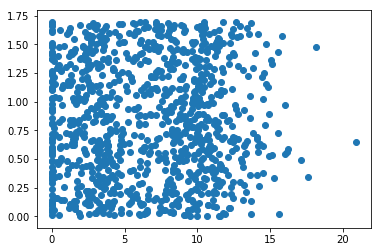

In [161]:
plt.show()

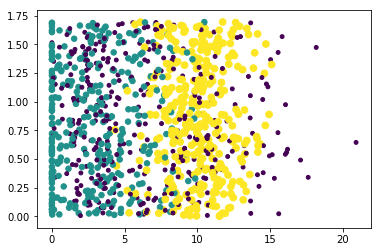

In [167]:
fig  = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2],
          15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

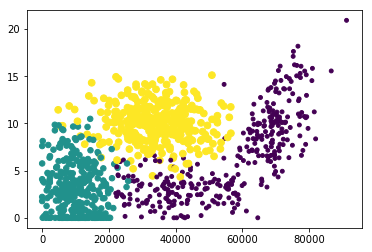

In [168]:
fig  = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1],
          15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

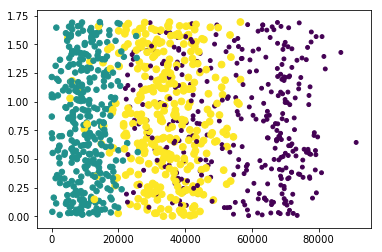

In [169]:
fig  = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 2],
          15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

In [181]:
title0 = 'The Number of Frequent Flyer Miles Earned Per Year'
title1 = 'Percentage of Time Spent Playing Video Games'
title2 = 'Liters of Ice Cream Consumed Per Week'
data0, data1, data2 = datingDataMat[:, 0], datingDataMat[:, 1], datingDataMat[:, 2]
legendString = ['Did Not Like', 'Liked in Small Doses', 'Liked in Large Doses']
output = [('b', 20) if x == 1 else ('g', 30) 
                    if x == 2 else ('r', 50) 
                    for x in datingLabels]

In [182]:
colors = [x for (x, y) in output]
markers = [y for (x, y) in output]

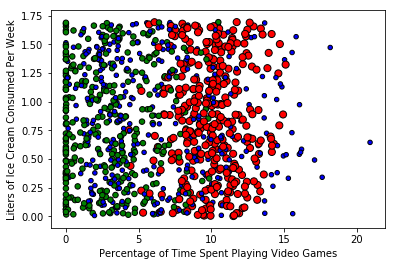

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data1, data2, c=colors, s=markers, edgecolors='k')
plt.xlabel(title1)
plt.ylabel(title2)

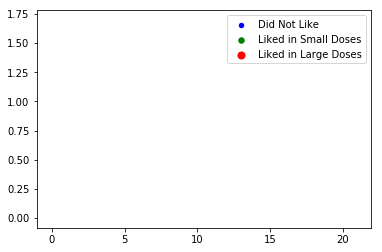

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)
type1 = ax.scatter([10], [-10], s=20, c='b')
type2 = ax.scatter([10], [-15], s=30, c='g')
type3 = ax.scatter([10], [-20], s=50, c='r')
ax.legend([type1, type2, type3], legendString, loc=1)
minX, maxX = min(data1), max(data1)
minY, maxY = min(data2), max(data2)
marginX, marginY = np.multiply(0.05, [maxX - minX, maxY - minY])
ax.axis([minX - marginX, maxX + marginX, minY - marginY, maxY + marginY])
plt.show()

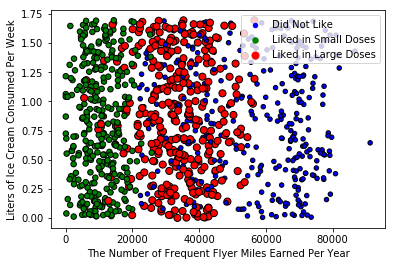

In [185]:
# x axis: The Number of Frequent Flyer Miles Earned Per Year
# y axis: Liters of Ice Cream Consumed Per Week
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data0, data2, c=colors, s=markers, edgecolors='k')
plt.xlabel(title0)
plt.ylabel(title2)
ax.legend([type1, type2, type3], legendString, loc=1)
minX, maxX = min(data0), max(data0)
minY, maxY = min(data2), max(data2)
marginX, marginY = np.multiply(0.05, [maxX - minX, maxY - minY])
ax.axis([minX - marginX, maxX + marginX, minY - marginY, maxY + marginY])
plt.show()

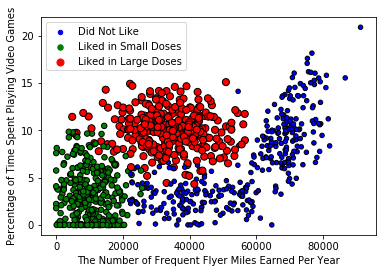

In [186]:
# x axis: The Number of Frequent Flyer Miles Earned Per Year
# y axis: Percentage of Time Spent Playing Video Games
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data0, data1, c=colors, s=markers, edgecolors='k')
plt.xlabel(title0)
plt.ylabel(title1)
ax.legend([type1, type2, type3], legendString, loc='best')
minX, maxX = min(data0), max(data0)
minY, maxY = min(data1), max(data1)
marginX, marginY = np.multiply(0.05, [maxX - minX, maxY - minY])
ax.axis([minX - marginX, maxX + marginX, minY - marginY, maxY + marginY])
plt.show()

##  Prepare: normalizing numeric values
#### 헬렌의 예에서 '연간 항공 마일리지 수' 특징이 거리를 계산하는데 있어 큰 영향을 미친다.
#### 원인:
 * 1) 해당 특징의 값 자체가 다른 특징보다 크다
 * 2) 특징 마다 값의 범위가 다르다

#### 정말로 해당 특징이 그만큼의 중요도가 있는가?
#### 헬렌은 세 가지 특징이 다 같은 정도의 중요도를 갖는다고 생각한다.
  - 하지만 연간 항공 마일리지 수는 다른 특징에 비해 값 자체가 크다.
  - 즉, 연간 항공 마일리지 수 특징의 값이 두 점 사이의 거리에 영향을 크게 미친다.
  - 즉, 연간 항공 마일리지 수의 중요도가 높다.

### Normalization (정규화)
 * 값의 범위를 [0, 1] 또는 [-1, 1]로 변환하는 것

#### [0, 1]로 정규화
  newValue = (oldValue - min) / (max - min)

In [188]:
reload(kNN)

<module 'kNN_py2' from 'kNN_py2.py'>

In [189]:
normMat, ranges, minVals = kNN.autoNorm(datingDataMat)

In [190]:
print(normMat)

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]


In [191]:
print(ranges)

[  9.12730000e+04   2.09193490e+01   1.69436100e+00]


In [192]:
print(minVals)

[ 0.        0.        0.001156]


## Test: testing the classifier as a whole program

### 기계 학습 알고리즘의 정확도
  * 데이터의 90% 정도를 분류기(classifier) 학습에 사용
  * 나머지 10%를 분류기의 정확도를 구하기 위한 테스트 데이터로 사용
  * 이 10% 데이터는 임의로 선택
  * 우리가 사용하는 데이터는 특정 순서로 저장된 것이 아니므로 처음 10% 또는 마지막 10%를 테스트 데이터로 선택하는 것이 임의로 10% 선택하는 것과 다를 바 없음
  
### 에러율(error rate)
  * error rate = 잘못 분류된 데이터 수 / 전체 데이터 수
  * error rate = 0 ==> 완벽한 분류기
  * error rate = 1.0 ==> 항상 잘못 분류하는 분류기

In [197]:
reload(kNN)

<module 'kNN_py2' from 'kNN_py2.py'>

In [198]:
kNN.datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

## 2.2.5 사용

In [205]:
reload(kNN)

<module 'kNN_py2' from 'kNN_py2.py'>

In [206]:
kNN.classifyPerson()

percentage of time spent playing video games?0.5
frequent flier miles earned per year?5600
liters of ice cream consumed per year?2
You will probably like this person:  in small doses


In [207]:
kNN.classifyPerson()

percentage of time spent playing video games?1
frequent flier miles earned per year?50000
liters of ice cream consumed per year?0.002
You will probably like this person:  not at all


In [208]:
kNN.classifyPerson()

percentage of time spent playing video games?0.2
frequent flier miles earned per year?50000
liters of ice cream consumed per year?2
You will probably like this person:  not at all


In [209]:
kNN.classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses
